In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
food_order = pd.read_csv("food_orders.csv")

In [3]:
print(food_order.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [4]:
food_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
food_order.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [6]:
food_order['Order Date and Time']  = pd.to_datetime(food_order['Order Date and Time'])
food_order['Delivery Date and Time'] = pd.to_datetime(food_order['Delivery Date and Time'])

In [7]:
def extract_discount(discount_str) :
    if isinstance(discount_str,float):
        return float(discount_str)
    elif 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0

food_order['Discount Percentage'] = food_order['Discounts and Offers'].apply(lambda x : extract_discount(x))


food_order['Discount Amount'] = food_order.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

food_order['Discount Amount'] = food_order.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(food_order[['Order Value','Discounts and Offers', 'Discount Percentage','Discount Amount']].head(),food_order.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  NaN              NaN
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [17]:
food_order['TotalCost']= food_order['Delivery Fee'] + food_order['Discount Amount'] + food_order['Payment Processing Fee']
food_order['Revenue'] = food_order['Commission Fee']
food_order['Profit'] = food_order['Revenue'] - food_order['TotalCost']

totalOrders = food_order.shape[0]
totalRevenue = food_order['Revenue'].sum()
totalProfit = food_order['Profit'].sum()
totalCost = food_order['TotalCost'].sum()

metrices = {
    'Total Orders' : totalOrders,
    'Total Cost' : totalCost,
    'Total Revenue' : totalRevenue,
    'Total Profit' : totalProfit
}

for key,value in metrices.items():
    print(f"{key} : {value}")

Total Orders : 1000
Total Cost : 221741.84999999998
Total Revenue : 126990
Total Profit : -117943.85


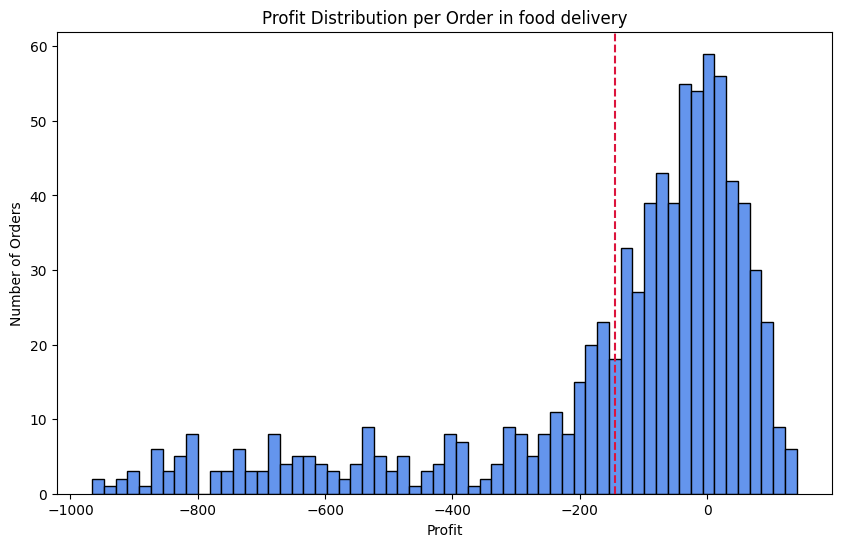

In [29]:
plt.figure(figsize=(10,6))
plt.hist(food_order['Profit'],bins = 60,color='cornflowerblue',edgecolor = 'black')
plt.title('Profit Distribution per Order in food delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_order['Profit'].mean(),color='crimson',linestyle = 'dashed',linewidth='1.5')
plt.show()

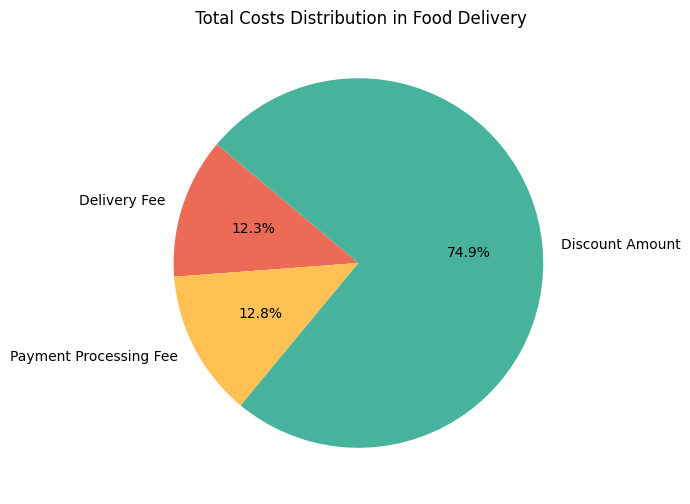

In [37]:
cost_distribution = food_order[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(6, 6))
plt.pie(cost_distribution,labels = cost_distribution.index,autopct='%1.1f%%',startangle=140,colors=['#EC6B56','#FFC154','#47B39C'])
plt.title(' Total Costs Distribution in Food Delivery')
plt.show()